In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Read the DATA

In [2]:
data=pd.read_csv('bank-full.csv')
data.head()
bank=pd.DataFrame(data)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 2.Perform the EDA

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.shape

(45211, 17)

In [5]:
bank.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [6]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
bank.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

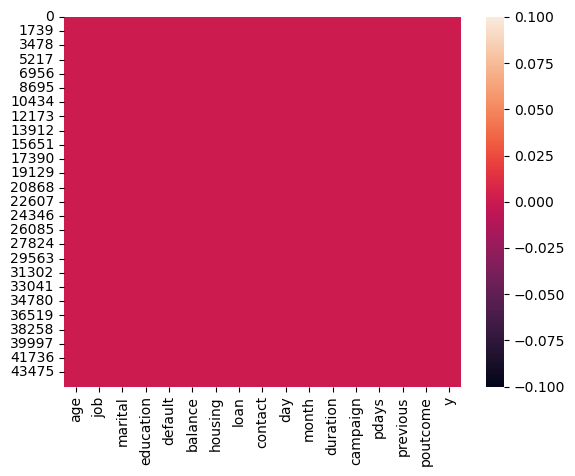

In [8]:
sns.heatmap(bank.isnull())

In [9]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
bank['job'] = pd.Categorical(bank['job'])
bank['job'] = bank['job'].cat.codes

In [11]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
bank['marital'] = pd.Categorical(bank['marital'])
bank['marital'] = bank['marital'].cat.codes

In [13]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
bank['education']=pd.Categorical(bank['education'])
bank['education']=bank['education'].cat.codes

In [15]:
bank['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [16]:
bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [17]:
bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [18]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [19]:
bank['contact']=pd.Categorical(bank['contact'])
bank['contact']=bank['contact'].cat.codes

In [20]:
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [21]:
def custom_map(month):
    month_mapping = {
        "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
        "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
    }
    return month_mapping.get(month.lower(), None)
bank['month'] = bank['month'].apply(custom_map)

In [22]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [23]:
bank['poutcome']=pd.Categorical(bank['poutcome'])
bank['poutcome']=bank['poutcome'].cat.codes

In [24]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [25]:
bank['default']=bank['default'].replace({'yes':1,'no':0}).astype(int)
bank['housing']=bank['housing'].replace({'yes':1,'no':0}).astype(int)
bank['loan']=bank['loan'].replace({'yes':1,'no':0}).astype(int)
bank['y']=bank['y'].replace({'yes':1,'no':0}).astype(int)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


In [26]:
bank.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,0.043142,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.050938,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,0.054729,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.173779,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


# 3.Check the Co-relation

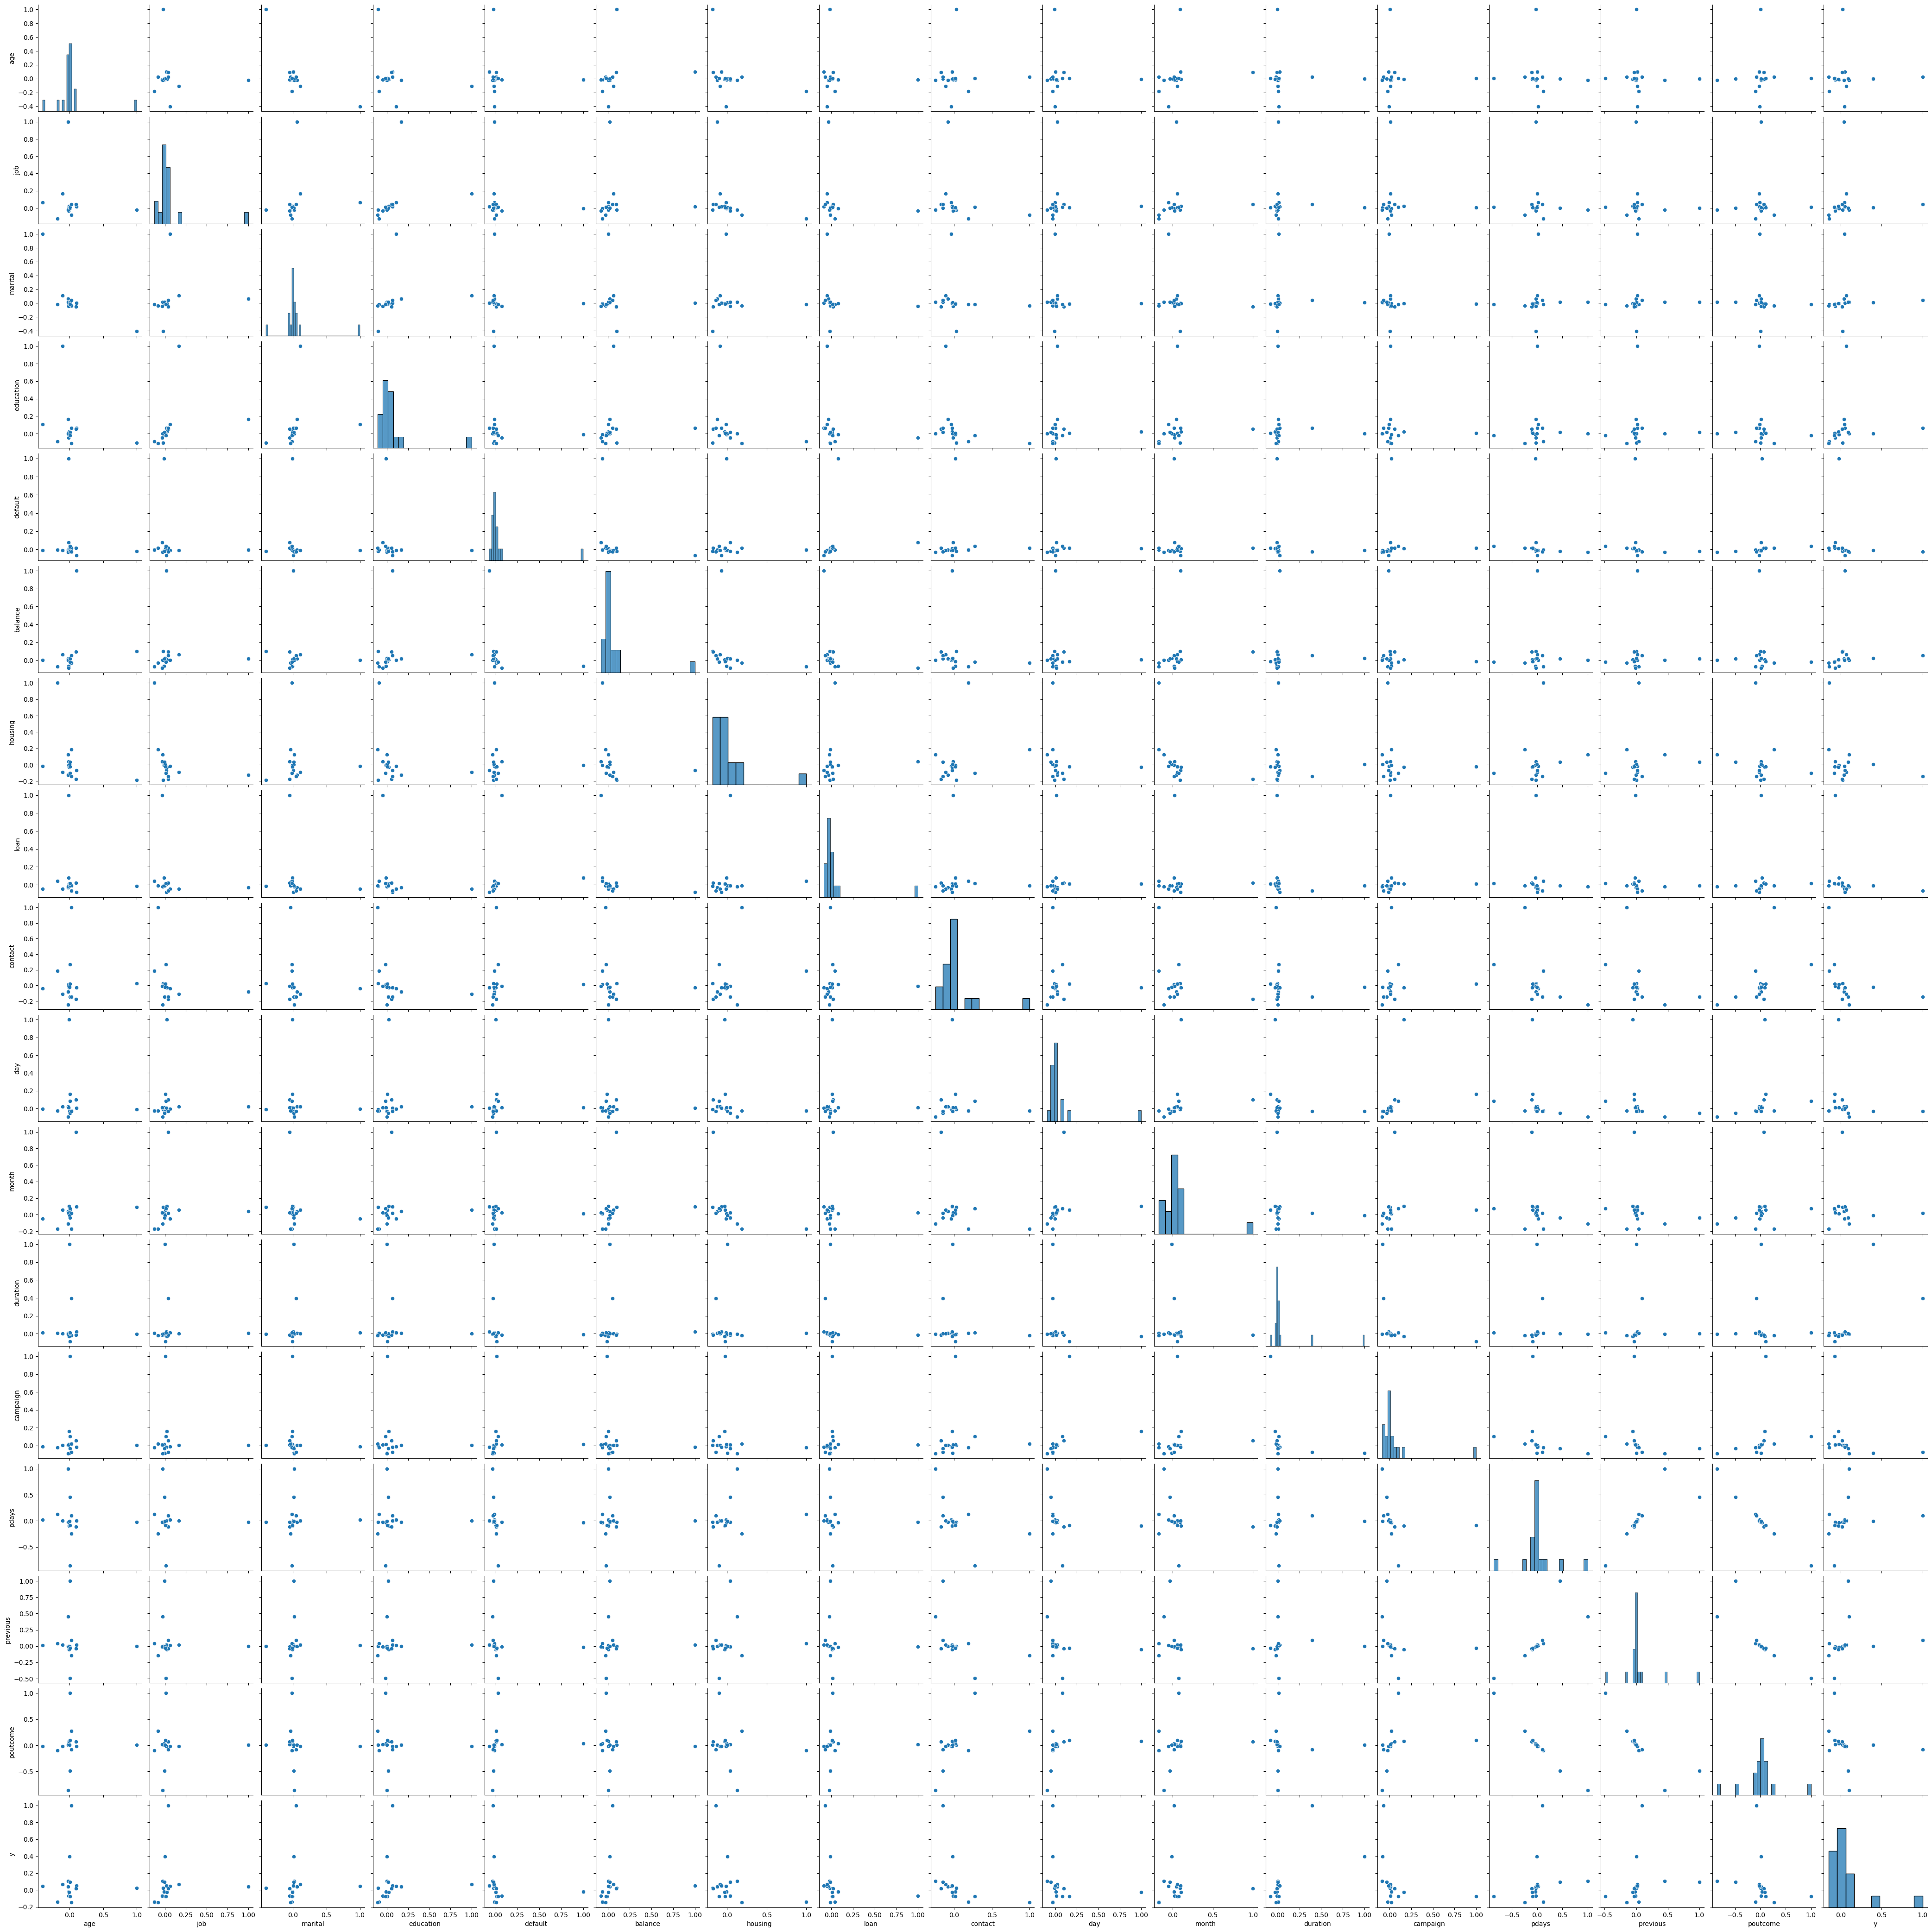

In [27]:
sns.pairplot(bank.corr())

# 4.Check for Influencers/Outliers

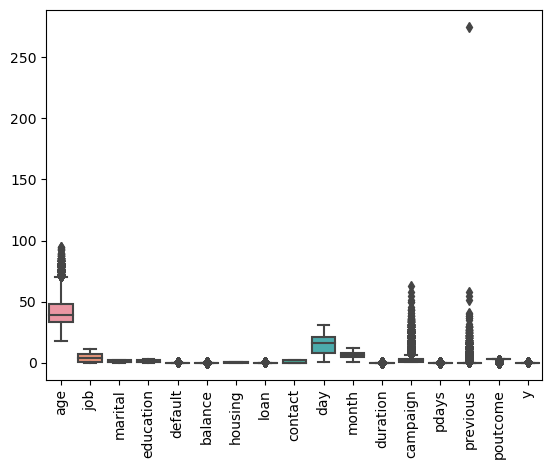

In [99]:
box=sns.boxplot(data=bank)
plt.xticks(rotation=90)
plt.show()

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
A=bank[['balance']]
B=bank[['duration']]
C=bank[['pdays']]

In [31]:
scaler=MinMaxScaler()

In [32]:
bank['balance']=scaler.fit_transform(A)
bank['duration']=scaler.fit_transform(B)
bank['pdays']=scaler.fit_transform(C)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,5,0.053070,1,0.000000,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0.080293,0,0,0,17,11,0.198658,3,0.000000,0,3,1
45207,71,5,0,0,0,0.088501,0,0,0,17,11,0.092721,2,0.000000,0,3,1
45208,72,5,1,1,0,0.124689,0,0,0,17,11,0.229158,5,0.212156,3,2,1
45209,57,1,1,1,0,0.078868,0,0,1,17,11,0.103294,4,0.000000,0,3,0


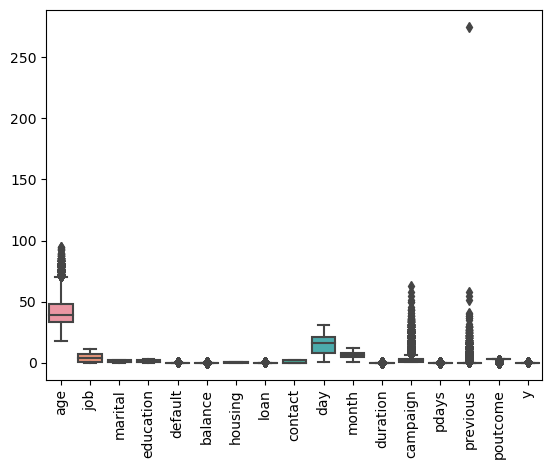

In [33]:
box=sns.boxplot(data=bank)
plt.xticks(rotation=90)
plt.show()

In [34]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  int8   
 2   marital    45211 non-null  int8   
 3   education  45211 non-null  int8   
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int8   
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int8   
 16  y          45211 non-null  int32  
dtypes: float64(3), int32(4), int64(5), int8(5)
memory usage: 3.7 MB


# Perform PP score matrix

In [40]:
!pip install ppscore

In [41]:
import ppscore as pps
pps.matrix(bank)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,job,0.0,regression,True,mean absolute error,2.689400,2.741682,DecisionTreeRegressor()
2,age,marital,0.0,regression,True,mean absolute error,0.405600,0.412687,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,0.540400,0.614811,DecisionTreeRegressor()
4,age,default,0.0,regression,True,mean absolute error,0.017800,0.034860,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
284,y,campaign,0.0,regression,True,mean absolute error,1.557600,1.795730,DecisionTreeRegressor()
285,y,pdays,0.0,regression,True,mean absolute error,0.046082,0.074804,DecisionTreeRegressor()
286,y,previous,0.0,regression,True,mean absolute error,0.572000,0.920264,DecisionTreeRegressor()
287,y,poutcome,0.0,regression,True,mean absolute error,0.436400,0.709295,DecisionTreeRegressor()


In [43]:
X=bank.iloc[:,:16]
y=bank.iloc[:,16]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

# 5.Build and Perform the model

In [45]:
from sklearn.linear_model import LogisticRegression
bankdata=LogisticRegression()

In [46]:
bankdata.fit(X_train,y_train)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
train_pred=bankdata.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
test_pred=bankdata.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
train_proba=bankdata.predict_proba(X_train)
train_proba

array([[0.98611933, 0.01388067],
       [0.89042128, 0.10957872],
       [0.93375802, 0.06624198],
       ...,
       [0.90760097, 0.09239903],
       [0.97168146, 0.02831854],
       [0.9878988 , 0.0121012 ]])

In [50]:
train_proba[:,1]

array([0.01388067, 0.10957872, 0.06624198, ..., 0.09239903, 0.02831854,
       0.0121012 ])

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [52]:
confusion_matrix(y_train,train_pred)

array([[31518,   452],
       [ 3513,   685]], dtype=int64)

In [53]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31970
           1       0.60      0.16      0.26      4198

    accuracy                           0.89     36168
   macro avg       0.75      0.57      0.60     36168
weighted avg       0.87      0.89      0.86     36168



In [54]:
train_proba=bankdata.predict_proba(X_train)
train_proba

array([[0.98611933, 0.01388067],
       [0.89042128, 0.10957872],
       [0.93375802, 0.06624198],
       ...,
       [0.90760097, 0.09239903],
       [0.97168146, 0.02831854],
       [0.9878988 , 0.0121012 ]])

In [55]:
train_proba[:,1]

array([0.01388067, 0.10957872, 0.06624198, ..., 0.09239903, 0.02831854,
       0.0121012 ])

In [56]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

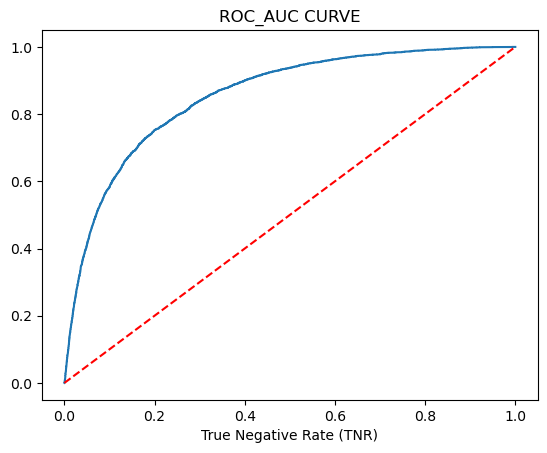

In [57]:
plt.plot(fpr,tpr)
plt.title('ROC_AUC CURVE')
plt.xlabel('False Positive Rate (FPR)')
plt.xlabel('True Negative Rate (TNR)')
plt.plot([0,1],[0,1],'r--')

In [58]:
roc_auc_score(y_train,train_proba[:,1])

0.8544999830862157

In [59]:
#testing data

In [60]:
confusion_matrix(y_test,test_pred)

array([[7830,  122],
       [ 911,  180]], dtype=int64)

In [61]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.16      0.26      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.57      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [62]:
test_proba=bankdata.predict_proba(X_test)
test_proba

array([[0.97304161, 0.02695839],
       [0.95319497, 0.04680503],
       [0.90000416, 0.09999584],
       ...,
       [0.96851002, 0.03148998],
       [0.99422213, 0.00577787],
       [0.95483907, 0.04516093]])

In [63]:
test_proba[:,1]

array([0.02695839, 0.04680503, 0.09999584, ..., 0.03148998, 0.00577787,
       0.04516093])

In [64]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])

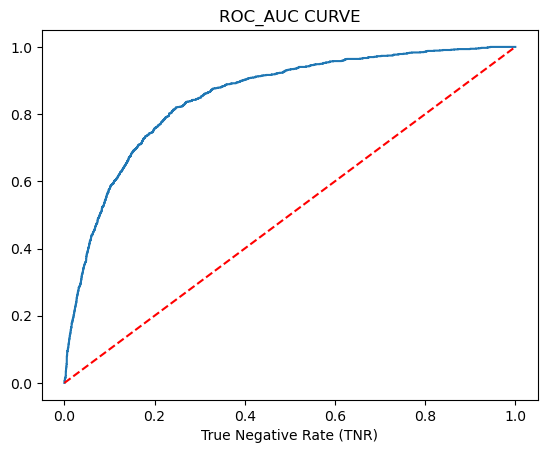

In [65]:
plt.plot(fpr,tpr)
plt.title('ROC_AUC CURVE')
plt.xlabel('False Positive Rate (FPR)')
plt.xlabel('True Negative Rate (TNR)')
plt.plot([0,1],[0,1],'r--')

In [66]:
roc_auc_score(y_test,test_proba[:,1])

0.8516863094239129

In [68]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

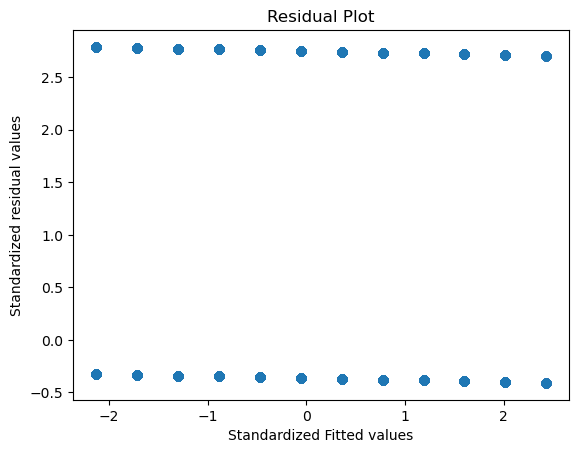

In [69]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# 6.Perform the Up-sampling for the above imbalanced data

In [72]:
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [73]:
X, y = make_classification(n_samples=45211, n_features=17, weights=[0.8, 0.2], random_state=42)

In [74]:
bank1 = pd.DataFrame(data=bank,columns=bank.columns)
bank1['y'] = y
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,5,0.053070,1,0.000000,0,3,1
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0.080293,0,0,0,17,11,0.198658,3,0.000000,0,3,0
45207,71,5,0,0,0,0.088501,0,0,0,17,11,0.092721,2,0.000000,0,3,1
45208,72,5,1,1,0,0.124689,0,0,0,17,11,0.229158,5,0.212156,3,2,1
45209,57,1,1,1,0,0.078868,0,0,1,17,11,0.103294,4,0.000000,0,3,1


In [75]:
majority_class = bank1[bank1['y'] == 0]
minority_class = bank1[bank1['y'] == 1]

In [76]:
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [77]:
df_upsampled = pd.concat([majority_class, upsampled_minority])
df_upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,0.000000,0,3,0
5,35,4,1,2,0,0.074901,1,0,2,5,5,0.028264,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,43,1,1,1,0,0.215705,1,0,2,14,5,0.051240,2,0.000000,0,3,1
1877,38,1,1,1,0,0.074356,1,0,2,9,5,0.058154,5,0.000000,0,3,1
33358,50,7,0,1,0,0.091097,1,0,0,20,4,0.145384,1,0.175459,1,0,1
26557,34,6,1,2,0,0.086830,1,0,0,20,11,0.181985,1,0.211009,2,0,1


In [78]:
X = df_upsampled.iloc[:,:16]
y = df_upsampled.iloc[:,16] 

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((57590, 16), (14398, 16), (57590,), (14398,))

In [80]:
from sklearn.linear_model import LogisticRegression
bankdata1=LogisticRegression()

In [81]:
bankdata1.fit(X_train,y_train)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
train_pred=bankdata1.predict(X_train)
train_pred

array([1, 0, 1, ..., 0, 0, 1])

In [102]:
test_pred=bankdata1.predict(X_test)
test_pred

array([1, 1, 0, ..., 0, 1, 1])

In [103]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [104]:
confusion_matrix(y_train,train_pred)

array([[13376, 15387],
       [12825, 16002]], dtype=int64)

In [105]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49     28763
           1       0.51      0.56      0.53     28827

    accuracy                           0.51     57590
   macro avg       0.51      0.51      0.51     57590
weighted avg       0.51      0.51      0.51     57590



In [106]:
train_proba=bankdata1.predict_proba(X_train)
train_proba

array([[0.48421133, 0.51578867],
       [0.52185196, 0.47814804],
       [0.49298053, 0.50701947],
       ...,
       [0.50838226, 0.49161774],
       [0.51839781, 0.48160219],
       [0.48269495, 0.51730505]])

In [107]:
train_proba[:,1]

array([0.51578867, 0.47814804, 0.50701947, ..., 0.49161774, 0.48160219,
       0.51730505])

In [108]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

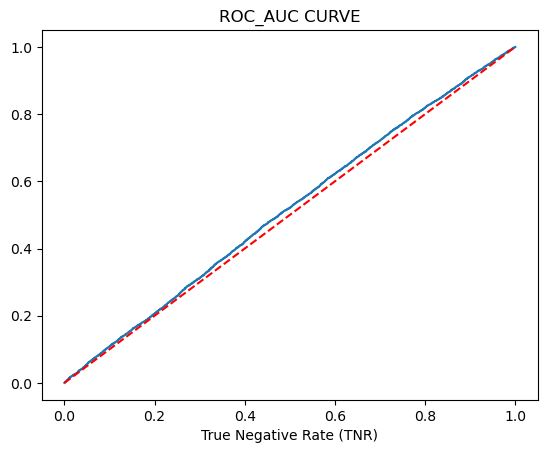

In [109]:
plt.plot(fpr,tpr)
plt.title('ROC_AUC CURVE')
plt.xlabel('False Positive Rate (FPR)')
plt.xlabel('True Negative Rate (TNR)')
plt.plot([0,1],[0,1],'r--')

Test Data

In [110]:
roc_auc_score(y_train,train_proba[:,1])

0.5148983918310436

In [111]:
confusion_matrix(y_test,test_pred)

array([[3411, 3820],
       [3241, 3926]], dtype=int64)

In [112]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49      7231
           1       0.51      0.55      0.53      7167

    accuracy                           0.51     14398
   macro avg       0.51      0.51      0.51     14398
weighted avg       0.51      0.51      0.51     14398



In [113]:
test_proba=bankdata1.predict_proba(X_test)
test_proba

array([[0.47474119, 0.52525881],
       [0.47815821, 0.52184179],
       [0.50453507, 0.49546493],
       ...,
       [0.51867966, 0.48132034],
       [0.49028941, 0.50971059],
       [0.48158642, 0.51841358]])

In [114]:
test_proba[:,1]

array([0.52525881, 0.52184179, 0.49546493, ..., 0.48132034, 0.50971059,
       0.51841358])

In [115]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])

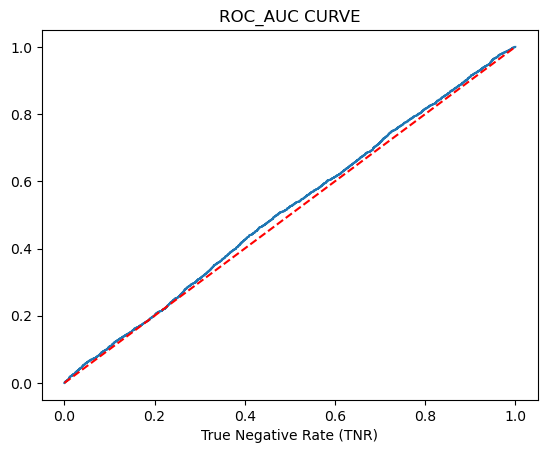

In [116]:
plt.plot(fpr,tpr)
plt.title('ROC_AUC CURVE')
plt.xlabel('False Positive Rate (FPR)')
plt.xlabel('True Negative Rate (TNR)')
plt.plot([0,1],[0,1],'r--')

In [117]:
roc_auc_score(y_test,test_proba[:,1])

0.5130160734355825

In [118]:
# From the above models that is before upsampling and after upsampling the accuracy is reduced , but the datas have been balanced.
#Before one have 0.89 accuracy wheras one after upsampling have 0.51